# Fourier Transformation Examples

<div class ="alert alert-success">
Task 1
    
Load the dataset 'data/ft_example1.csv'. This dataset is from https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/ and contains the hourly air temperature data for one specific location. The column 'seconds' was already calculated out of the other time-related columns. The relevant data is stored in the 'TT_TU' column. 

    
Do the Fourier Transform. 
And try to interprete as many peaks as possible.

    
Hint: be aware of the sampling frequency and their unit and the interpretation of corresponding frequencies after the FT.
</div>

In [2]:
import numpy as num
import matplotlib.pyplot as plt

import pandas as pd

# file = 'data/NY_climate_2010_modified.csv'
file = 'data/hourly_data_modified.txt' # https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/

data = pd.read_csv(file)

In [4]:
print(data.columns)

Index(['Unnamed: 0', 'STATIONS_ID', 'MESS_DATUM', 'QN_9', 'TT_TU', 'RF_TU',
       'eor', 'year', 'month', 'day', 'minute', 'datetime', 'seconds'],
      dtype='object')


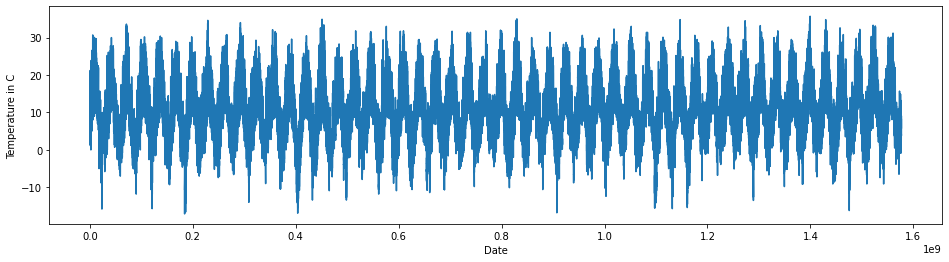

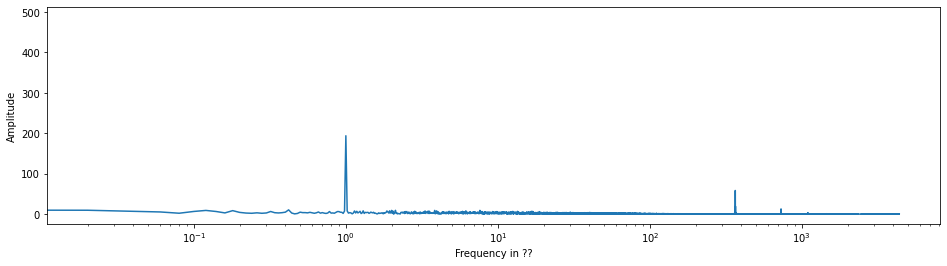

Peak-Frequencies: [   1.  365.  730. 1094. 1462. 1824. 2188. 2555.]


In [60]:

tempcol = 'TT_TU'

timecol = 'seconds'

# numyears = 0.009
# numyears = 5
numyears = 50
idxyear = int(24*365 * numyears)

xdata = data[timecol][:idxyear]
ydata = data[tempcol][:idxyear]

plt.figure(figsize=(16, 4))
plt.plot(xdata, ydata)
plt.xlabel('Date')
plt.ylabel('Temperature in C')


## Sampling interval
# dt = (60*60) # in secs
# dt = 1 # in hours
# dt = 1 / 24 # in days
dt = 1 / (24*365) # in years

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
phase =  num.angle(ft)
freqs = num.fft.rfftfreq(len(ydata), d=dt)

plt.figure(figsize=(16, 4))
#plt.plot(freq, amps)
plt.semilogx(freqs, amps)
# plt.loglog(freqs, amps)
plt.xlabel('Frequency in ??')
plt.ylabel('Amplitude')
# plt.ylim(0, 1e5)
plt.show()

from scipy.signal import find_peaks
peaks, _ = find_peaks(amps, height=0.1, distance=10000)
num.set_printoptions(suppress=True)
print('Peak-Frequencies:', freqs[peaks])